In [1]:
#___________________________________________________________________________________________________________________
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

import matplotlib.pyplot as plt
import sys
import os
sys.path.append("./src/")
from sub_mesh        import * 
from sub_data        import * 
from sub_plot        import * 
from sub_climatology import *
from colormap_c2c    import colormap_c2c
import time as time 

#___LOAD FESOM2 MESH___________________________________________________________________________________
meshpath='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
mesh=load_mesh_fesom2(meshpath, do_rot='None', focus=0, do_info=True, do_pickle=True,
                      do_earea=True, do_narea=True, do_eresol=[True,'mean'], do_nresol=[True,'eresol'])

 > found *.pckl file: /work/ollie/pscholz/meshcache_tripyview/core2
 > load  *.pckl file: tripyview_fesom2_core2.pckl
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/projects/clidyn/FESOM2/meshes/core2
 > id              = core2
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, True
 > do narea,nresol = True, True
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________


___FESOM2 DATA INFO________________________
 > Dimensions : Frozen(SortedKeysDict(OrderedDict([('nod2', 126858)])))
 > Coordinates:
    *empty*
 > Data variables:
    sst      (nod2) float32 -1.8059417 -1.329333 ... 24.487108 24.418913
 ___________________________________________


<IPython.core.display.Javascript object>


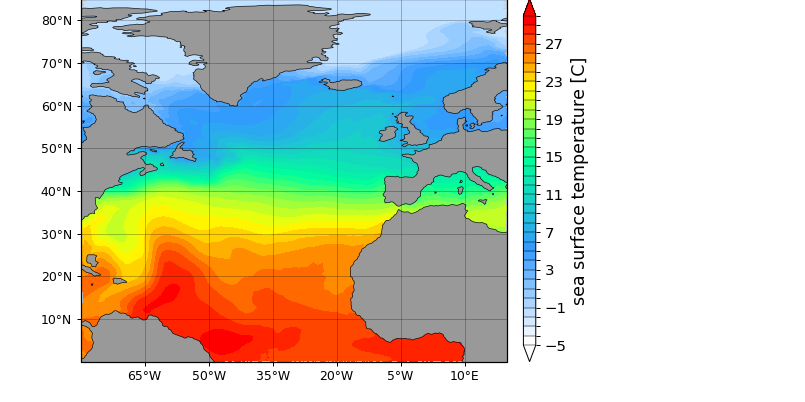

In [66]:
#___LOAD FESOM2 DATA___________________________________________________________________________________
datapath        = '~/results/test_core2_ncep_5/1/'
vname           = 'sst'
year            = 1979
mon, day, record= None, None, 0
depth           = None
data            = load_data_fesom2(mesh, datapath, vname=vname, 
                                   year=year, mon=mon, day=day, record=record, 
                                   depth=depth)

#___PLOT FESOM2 DATA___________________________________________________________________________________
cinfo=dict({'cstr':'wbgyr', 'cnum':20, 'crange':[-5, 30, 15]})
fig, ax, cbar = plot_hslice(mesh, data, cinfo=cinfo, box=[-80,20,0,85], do_lsmask='fesom') 
                            #, do_save='~/figures/test_tripyview/test.png')

In [50]:
fig, ax = plot_hmesh(mesh, box=[-80,20,0,85], do_lsmask='bluemarble', linecolor='w', linealpha=0.5, linewidth=0.2,)
                    #do_save='~/figures/test_tripyview/test_mesh.png')

<IPython.core.display.Javascript object>


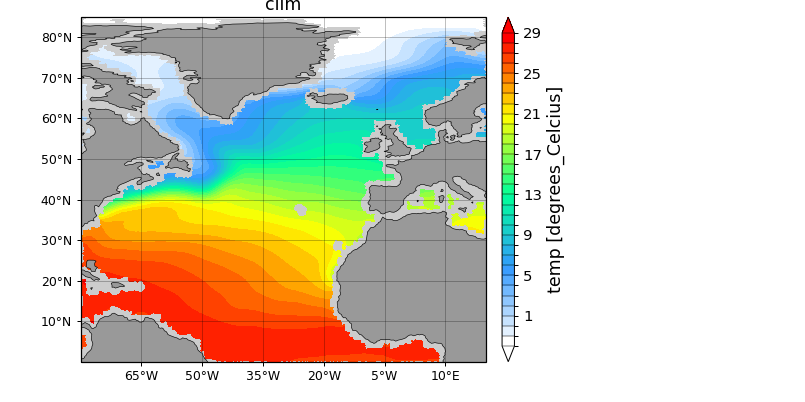

In [69]:
climpath = '~/fesom2.0_github/view/phc3/phc3.0_annual.nc'
clim = load_climatology(mesh,climpath,'temp', depth = 10, depidx=True)
cinfo=dict({'cstr':'wbgyr', 'cnum':20})
fig, ax, cbar = plot_hslice(mesh, clim, cinfo=cinfo, box=[-80,20,0,85], do_lsmask='fesom',title='descript',pos_fac=0.95) 

<IPython.core.display.Javascript object>


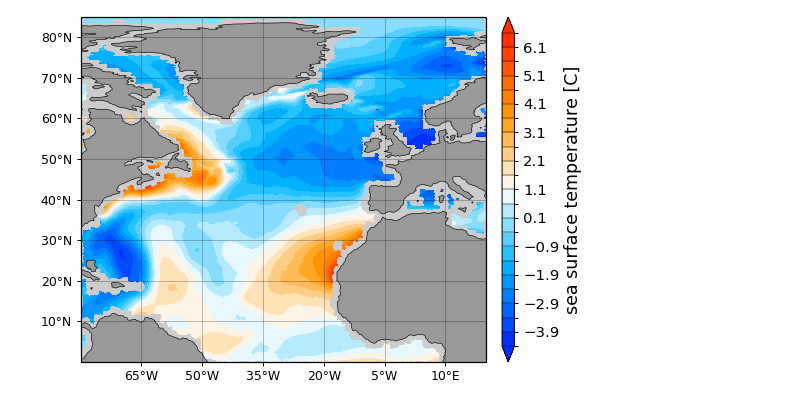

In [71]:
anom = do_anomaly(data,clim)
cinfo=dict({'cstr':'blue2red', 'cnum':20})
fig, ax, cbar = plot_hslice(mesh, anom, cinfo=cinfo, box=[-80,20,0,85], do_lsmask='fesom', title='descript', pos_fac=0.95) #[-80,20,0,85]